# 9.7 ~ 12 QUIZ

In [7]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import matplotlib.pylab as plt
from sklearn.datasets import fetch_california_housing

## 1. 주어진 데이터를 활용하여 물음에 답하시오.

In [8]:
x = np.array([4.5, 7.52, 6.44, 5.91, 1.58, 3.58, 1.08, 8.47, 7.89, 4.93, 7.57, 4.6, 3.56, 6.14, 1.22, 9.84, 8.43, 7.2, 5.15, 1.08, 3.44, 5.15, 7.53, 9.64, 9.08, 1.83, 3.04, 5.56, 5.96, 7.2])
y = np.array([10.56, 13.35, 12.38, 11.94, 8.27, 8.0, 6.61, 15.21, 13.89, 11.64, 13.3, 9.2, 8.03, 11.79, 6.6, 15.46, 15.34, 13.4, 11.47, 6.79, 10.92, 11.06, 12.16, 15.14, 14.76, 7.49, 8.34, 11.93, 14.49, 11.44])

data = {'Y':y, 'X':x}
data = pd.DataFrame(data)

data.head()

,Y,X
0,10.56,4.50
1,13.35,7.52
2,12.38,6.44
3,11.94,5.91
4,8.27,1.58


### 1-1. 원자료에 대해 산점도 그래프를 나타내고 단순선형회귀분석을 수행하시오.

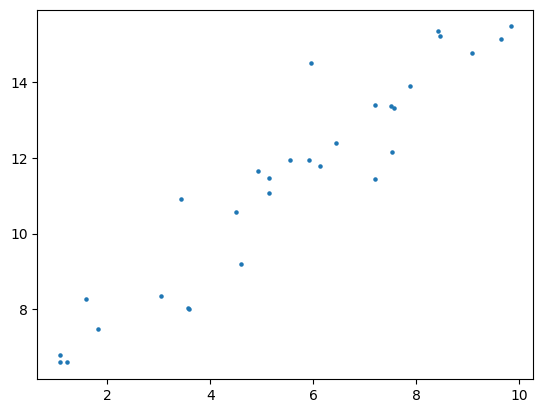

In [9]:
plt.scatter(x, y, s = 5, marker = 'o')

In [10]:
fit1 = smf.ols('Y~X', data).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     238.5
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           3.15e-15
Time:                        02:54:37   Log-Likelihood:                -39.438
No. Observations:                  30   AIC:                             82.88
Df Residuals:                      28   BIC:                             85.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7351      0.402     14.253      0.0

### 1-2. $X$를 $X^2$로 변수변환하고 회귀분석을 다시 수행하고 결과를 해석하시오.

In [11]:
x = x ** 2

data = {'Y':y, 'X':x}
data = pd.DataFrame(data)

fit2 = smf.ols('Y~X', data).fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           2.69e-12
Time:                        02:54:37   Log-Likelihood:                -46.636
No. Observations:                  30   AIC:                             97.27
Df Residuals:                      28   BIC:                             100.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9983      0.360     22.214      0.0

- $R^2$값이 증가하므로 변수변환에 따른 모형이 $Y$를 더 잘 설명하고 있음을 알 수 있다.

## 2. 주어진 데이터를 바탕으로 아래 물음에 답하시오.

In [18]:
import pandas as pd                            

dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 2-1. 위 데이터를 바탕으로 $Y$를 target으로, $X$를 MedInc, HouseAge, Population으로 하는 다중회귀분석을 수행하고 결과를 해석하시오.

In [19]:
fit = smf.ols('target~MedInc+HouseAge+Population', df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7159.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:55:05   Log-Likelihood:                -24880.
No. Observations:               20640   AIC:                         4.977e+04
Df Residuals:                   20636   BIC:                         4.980e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1736      0.022     -7.722      0.0

- 분산분석표의 $p$값이 0.00이므로 모든 설명변수가 $Y$를 설명할 수 없다는 $H_0$를 기각한다.

- 추정된 회귀식의 추정된 계수들에 대해 $p$값이 매우 작으므로 각각 유의미함을 알 수 있다.

### 2-2. 위 데이터에 대해 모든 변수에 대해 표준화를 실행하고 다중회귀분석을 다시 수행하고 결과를 해석하시오.

In [20]:
df_z = df.select_dtypes(include = [np.number]).dropna().apply(stats.zscore)
fit2 = smf.ols('target~MedInc+HouseAge+Population', df_z).fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7159.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:55:09   Log-Likelihood:                -21925.
No. Observations:               20640   AIC:                         4.386e+04
Df Residuals:                   20636   BIC:                         4.389e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.663e-16      0.005   5.46e-14      1.0

- 위에서 수행한 것과 결과는 크게 달라지지 않는다. 다만 추정 계수의 값은 표준화 이후 그 값이 달라진다.

### 2-3. 후진제거법을 활용할 때 최종 선택 변수를 제시하시오.

In [21]:
def backward_regression(X, y, threshold_out = 0.05):
    # threshold_out : P-value 임계값 (제거 기준)
    
    feature_list = X.columns.tolist()
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature_list
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[feature_list]))).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(y, sm.add_constant(pd.DataFrame(X[feature_list]))).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
      
    return included,step,steps,adj_r_squared_list,sv_per_step

In [22]:
backward_valriables_function,step,steps,adj_r_squared_list,sv_per_step = backward_regression(df.drop(['target'], axis = 1), df[['target']])

In [23]:
backward_valriables_function

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'AveOccup',
 'Latitude',
 'Longitude']

### 2-4. 후진제거법에 의한 최종 변수를 바탕으로 회귀분석을 다시 수행하고 결과를 해석하시오.

In [24]:
fit3 = smf.ols('target~MedInc+HouseAge+AveRooms+AveBedrms+AveOccup+Latitude+Longitude', df).fit()
print(fit3.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:56:55   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9175      0.658    -56.085      0.0

- 앞서 진행했던 다중회귀분석의 결과보다 모형의 설명력이 더 높아진 것을 알 수 있다.